In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import optuna
from optuna.trial import TrialState


# Playing with torch and stuff

In [ ]:
data = [[0,1,1,0,0,1,1],[0,1,1,0,0,1,1],[0,1,1,0,0,1,1],[0,1,1,0,0,1,1]]
x_data = torch.tensor(data)
print(x_data)
print(type(x_data))
print('dtype. ', x_data.dtype)
print('device ', x_data.device)

tensor([[0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1]])
<class 'torch.Tensor'>
dtype.  torch.int64
device  cpu


In [ ]:
#Set the tensor using GPU
x_gpu = torch.tensor(data, device = 'cuda')
print(x_gpu.dtype)
print(x_gpu.device)

RuntimeError: ignored

In [ ]:
shape = (10,5)

a = torch.rand(shape)
b = torch.ones(shape)
c = torch.zeros(shape)

print(a)
print(b)
print(c)

tensor([[0.8556, 0.7136, 0.4824, 0.0116, 0.8917],
        [0.8110, 0.3378, 0.2769, 0.1347, 0.5482],
        [0.3351, 0.8457, 0.9527, 0.9788, 0.3322],
        [0.4291, 0.0620, 0.2991, 0.3836, 0.3166],
        [0.9046, 0.6579, 0.7335, 0.1568, 0.6024],
        [0.7325, 0.3162, 0.3128, 0.5024, 0.5866],
        [0.7851, 0.1351, 0.7251, 0.9427, 0.6337],
        [0.1833, 0.2510, 0.6610, 0.5816, 0.6852],
        [0.3686, 0.5746, 0.0748, 0.3906, 0.7032],
        [0.4366, 0.4482, 0.6993, 0.8226, 0.9192]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0

In [ ]:
a = torch.tensor([[1,2,3,4],[4,5,6,7], [7,8,9,10]])
print(a)
b = torch.tensor([[7,8,9,4], [4,5,6,7], [1,2,3,4]])
print(b)
c = torch.tensor([[7,8,9,4,5], [4,5,6,7,8], [1,2,3,4,5]])
print(c)
print(a.shape)

c = torch.cat([a,b], dim = 1)
print(c)
print(c.shape)

d = torch.cat([a,b], dim = 0)
print(d)
print(d.shape)

#Note: when we concat with this dimension, other dimension has to be the same
e = torch.cat([a,c], dim = 1)
print(e)
print(e.shape)

# This gonna throw an error because dim 1 of a and c are not the same
# f = torch.cat([a,c], dim = 0)
# print(f)
# print(f.shape)



tensor([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10]])
tensor([[7, 8, 9, 4],
        [4, 5, 6, 7],
        [1, 2, 3, 4]])
tensor([[7, 8, 9, 4, 5],
        [4, 5, 6, 7, 8],
        [1, 2, 3, 4, 5]])
torch.Size([3, 4])
tensor([[ 1,  2,  3,  4,  7,  8,  9,  4],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 7,  8,  9, 10,  1,  2,  3,  4]])
torch.Size([3, 8])
tensor([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10],
        [ 7,  8,  9,  4],
        [ 4,  5,  6,  7],
        [ 1,  2,  3,  4]])
torch.Size([6, 4])
tensor([[ 1,  2,  3,  4,  1,  2,  3,  4,  7,  8,  9,  4],
        [ 4,  5,  6,  7,  4,  5,  6,  7,  4,  5,  6,  7],
        [ 7,  8,  9, 10,  7,  8,  9, 10,  1,  2,  3,  4]])
torch.Size([3, 12])


In [ ]:
a = torch.rand((3,4))
b = torch.rand((3,4))

#element wise, either * or tensor.mul(other)
print(a * b)
print(a.mul(b))

tensor([[0.0280, 0.2950, 0.3302, 0.8024],
        [0.0796, 0.0230, 0.1364, 0.2917],
        [0.3723, 0.1980, 0.0030, 0.0520]])
tensor([[0.0280, 0.2950, 0.3302, 0.8024],
        [0.0796, 0.0230, 0.1364, 0.2917],
        [0.3723, 0.1980, 0.0030, 0.0520]])


In [ ]:
#matrix multiplication is matmul or @

#this won't work because of dimension does not work ofr mat mul
# print(a@b)

c = torch.rand((4,3))
print(a@c)

tensor([[0.3284, 1.1790, 0.8035],
        [0.5102, 1.5713, 0.8226],
        [0.1024, 0.7173, 0.4849]])


# AUTOGRAD

In [ ]:
import torch
from torchvision.models import resnet18, ResNet18_Weights


# Training a model on CIFAR10

In [ ]:
#Import that dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

def load_dataset(batch_size = 4):

  trainset = torchvision.datasets.CIFAR10(root='./data',
                                          train=True,
                                          download=True,
                                          transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=2)
  testset = torchvision.datasets.CIFAR10(root='./data',
                                         train=False,
                                        download=True,
                                         transform=transform)
  testloader = torch.utils.data.DataLoader(testset,
                                           batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)

  classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  return trainloader, testloader, classes

trainloader, testloader, classes = load_dataset()

100%|██████████| 170498071/170498071 [00:03<00:00, 43419564.07it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


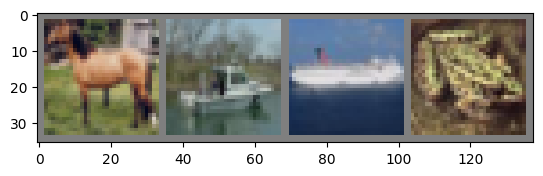

horse ship  ship  frog 


In [ ]:
#Showing some samples from the dataset the dataset

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x



In [ ]:
#Train the model

def train(net, loss_fn, optimizer, trainloader, debug = True, epochs = 5):

  for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()

      outputs = net(inputs)

      loss = loss_fn(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss+= loss.item()

      if debug:
        if i % 2000 == 1999:    # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0

def accuracy(net, loader):
  correct = 0
  total = 0

  with torch.no_grad():
    for data in loader:
      inputs, labels = data[0].to(device), data[1].to(device)
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  return correct / total


In [ ]:
net = Net()
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

In [ ]:
#Print the test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
print(labels)
print(len(testloader))

# Part 2: Trying different parameters and evaluate the result

# Experiment 1:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 6,kernel = 5)
2.  Conv2(input = 6, output = 16,kernel = 5)
3.  Fully Connected Lyaer(input = 400, output = 120)
4.  Fully Connected Lyaer(input = 120, output = 84)
5.  Fully Connected Lyaer(input = 84, output = 10)

• Activation function: relu

• Optimizer: SGD

• Learning rate: 0.1

• Accuracy on training set: 22%

• Accuracy on validation set: 23%


In [ ]:
#using lr = 0.1, momentum = 0.1
net = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.1)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

# Experiment 2:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 6,kernel = 5)
2.  Conv2(input = 6, output = 16,kernel = 5)
3.  Fully Connected Lyaer(input = 400, output = 120)
4.  Fully Connected Lyaer(input = 120, output = 84)
5.  Fully Connected Lyaer(input = 84, output = 10)

• Activation function: relu

• Optimizer: Adam

• Learning rate: 0.01

• Accuracy on training set: 10%

• Accuracy on validation set: 10%


In [ ]:
#using lr = 0.01, weight decay = 0.5 using Adam Optimizer
net = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01, weight_decay = 0.5)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

# Experiment 3:
• Number of layers: 2

• Number of nodes per layer:

1.  Conv1(input = 3, output = 6,kernel = 5)
2.  Conv2(input = 6, output = 32,kernel = 5)
3.  Fully Connected Lyaer(input = 800, output = 120)
4.  Fully Connected Lyaer(input = 120, output = 84)
5.  Fully Connected Lyaer(input = 84, output = 10)

• Activation function: relu

• Optimizer: SGD

• Learning rate: 0.001

• Accuracy on training set: 51%

• Accuracy on validation set: 50%

In [ ]:
class Net1(nn.Module):
  def __init__(self):
    super().__init__()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 32, 5)
    self.fc1 = nn.Linear(32 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

#input size = 3,32,3
net = Net1()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
train(net, loss_fn, optimizer, trainloader)

train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

# Part 3: Using Optuna to tune the model

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna.trial import TrialState

In [ ]:
def model():

  layers = []

  layers.append(nn.Conv2d(3,6,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))
  layers.append(nn.Conv2d(6,16,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))
  layers.append(nn.Flatten())
  layers.append(nn.LazyLinear(120))
  layers.append(nn.ReLU())
  layers.append(nn.LazyLinear(84))
  layers.append(nn.ReLU())
  layers.append(nn.LazyLinear(10))

  return nn.Sequential(*layers)

net = model()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
train(net, loss_fn, optimizer, trainloader)
train_acc = accuracy(net, trainloader)
test_acc = accuracy(net, testloader)
print('train accuracy = ', train_acc)
print('test accuracy = ', test_acc)

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Running with DEVICE=', DEVICE)

def define_model(trial):

  layers = []
  output1 = trial.suggest_int('conv2d_layer_1_output', 4, 32, 4)
  layers.append(nn.Conv2d(3,output1,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))

  output2 = trial.suggest_int('conv2d_layer_2_output', 16, 64, 16)
  layers.append(nn.LazyConv2d(output2,5))
  layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(2,2))

  layers.append(nn.Flatten())

  fc_output1 = trial.suggest_int('fc_output_1', 128, 512, 128)
  layers.append(nn.LazyLinear(fc_output1))
  layers.append(nn.ReLU())
  fc_output2 = trial.suggest_int('fc_output_2', 16, 84, 16)
  layers.append(nn.LazyLinear(fc_output2))
  layers.append(nn.ReLU())
  layers.append(nn.LazyLinear(10))

  return nn.Sequential(*layers)


#Training loop
def train(net, loss_fn, optimizer, trainloader, debug = True, epochs = 5):

  for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()

      outputs = net(inputs)

      loss = loss_fn(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss+= loss.item()

      if debug:
        if i % 2000 == 1999:    # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0

def accuracy(net, loader):
  correct = 0
  total = 0

  with torch.no_grad():
    for data in loader:
      inputs, labels = data[0].to(device), data[1].to(device)
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  return correct / total

def objective(trial):
  model = define_model(trial).to(device)
  lr = trial.suggest_float('lr', 1e-6, 1e-1, log = True)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr = lr)
  epochs = 5

  for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()

      outputs = net(inputs)

      loss = loss_fn(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss+= loss.item()

      if i % 2000 == 1999:    # print every 2000 mini-batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        running_loss = 0.0

    acc = accuracy(model, testloader)
    print(f'epoch={epoch}, accuracy = {acc}')
    trial.report(acc, epoch)

    if trial.should_prune():
      raise optuna.exceptions.TrialPruned()

  return acc

#Run the opuna
print('Optimizing with optuna ... ')
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))
print("Best trial:")
trial = study.best_tria
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


In [ ]:

#Set optimizer learning rate to 0.1

best_params = {
   'acc': 0,
   'lr': 0,
   'momentum': 0,
}

for lr in [0.001, 0.0001, 0.002, 0.0025, 0.003]:
  for momentum in [0.90, 0.95, 0.96, 0.98, 0.99, 0.5, 0.1, 0.3, 0.7, 0.8]:
    print(f'Training with lr = {lr}, momentum = {momentum}')
    #Start training procedure
    net = Net()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr = lr, momentum =momentum)
    train(net, loss_fn, optimizer, trainloader)
    acc = accuracy(net, testloader)
    if acc > best_params['acc']:
      best_params['acc'] = acc
      best_params['lr'] = lr
      best_params['momentum'] = momentum

    print('Acc = ', acc)


print(best_params)

#Set optimizer momentum to 2.0, 1.5, 0.5,


# References:

https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html